# **3 Figures and Tables**

## 3.1 Preparations

In [1]:
import json
import os
import zipfile
import numpy as np
import geopandas as gpd
import sklearn
import torch
import matplotlib.pyplot as plt
import torchvision
import importlib
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg

In [2]:
print(f"PyTorch version: {torch.__version__}\nTorchvision version: {torchvision.__version__}")

from torch import nn

PyTorch version: 2.5.1+cu124
Torchvision version: 0.20.1+cu124


In [3]:
print("CUDA available:", torch.cuda.is_available())
print("CUDA Version:", torch.version.cuda)
print("Number of GPUs:", torch.cuda.device_count())
print("GPU Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU identified")

CUDA available: False
CUDA Version: 12.4
Number of GPUs: 0
GPU Name: No GPU identified


In [4]:
# use gpu if available
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [5]:
import os
print(os.path.abspath("configs"))

/home/sc.uni-leipzig.de/rf37uqip/MoSE/notebooks/configs


In [6]:
# path to repository folder
import sys
sys.path.append(os.path.abspath('/home/sc.uni-leipzig.de/rf37uqip/MoSE/'))

In [7]:
# import configs.py-file
from configs import configs_sc
importlib.reload(configs_sc) # reload changes

<module 'configs.configs_sc' from '/home/sc.uni-leipzig.de/rf37uqip/MoSE/configs/configs_sc.py'>

In [8]:
# input directories: patches and masks
patches_dir = configs_sc.DATA_DIR["patches"]
masks_dir = configs_sc.DATA_DIR["masks"]

# output directories: trained models
models_dir = configs_sc.DATA_DIR["models"]

# additional directories: class (labels and) codes
# labels_dir = configs_sc.DATA_DIR["labels"]
codes_dir = configs_sc.DATA_DIR["codes"]

figures_dir = configs_sc.DATA_DIR["figures"]

In [9]:
# import data_utils.py helper-functions script
from scripts import data_utils
importlib.reload(data_utils) # reload changes

# import model_utils.py helper-functions script
from scripts import model_utils
importlib.reload(model_utils) # reload changes

# import train_utils.py helper-functions script
from scripts import train_utils
importlib.reload(train_utils) # reload changes

# import evaluation_utils.py helper-functions script
from scripts import evaluation_utils
importlib.reload(evaluation_utils) # reload changes

# import visualization_utils.py helper function script
from scripts import visualization_utils
importlib.reload(visualization_utils) # reload changes

<module 'scripts.visualization_utils' from '/home/sc.uni-leipzig.de/rf37uqip/MoSE/scripts/visualization_utils.py'>

## 3.2 Figures and Tables

In [10]:
image_names = [
    "class_1.png",  
    "class_2.png",
    "class_3.png",
    "class_4.png"
]

image_paths = [os.path.join(figures_dir, name) for name in image_names]

NameError: name 'images' is not defined

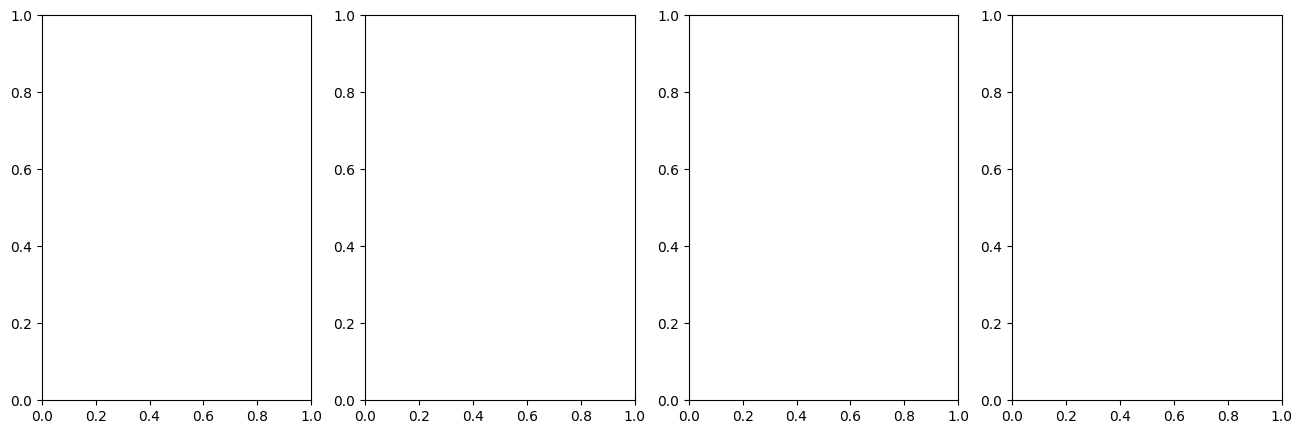

In [11]:
# Plot erstellen
fig, axes = plt.subplots(1, 4, figsize=(16, 5))  # 1 Zeile, 4 Spalten

for i, ax in enumerate(axes):
    ax.imshow(images[i])
    ax.axis("off")

    # Schwarze, dünne Umrandung
    rect = patches.Rectangle(
        (0, 0),  # untere linke Ecke
        images[i].shape[1], images[i].shape[0],
        linewidth=1.5,
        edgecolor='black',
        facecolor='none',
        transform=ax.transData
    )
    ax.add_patch(rect)

    # Oben: Klassennummer
    ax.set_title(class_numbers[i], fontsize=22, pad=10)

    # Unten: Klassennamen kursiv
    ax.text(0.5, -0.12, f"{class_names[i]}", fontsize=25, ha='center', va='top',
            transform=ax.transAxes, style='italic')

    circle = patches.Circle((images[i].shape[1]-30, 30), 20, color="black", alpha=0.4)
    ax.add_patch(circle)
    ax.text(images[i].shape[1]-30, 30, f"{int(class_frequencies[i]*100)}%", 
        color="white", fontsize=10, ha='center', va='center')



plt.tight_layout()
plt.show()

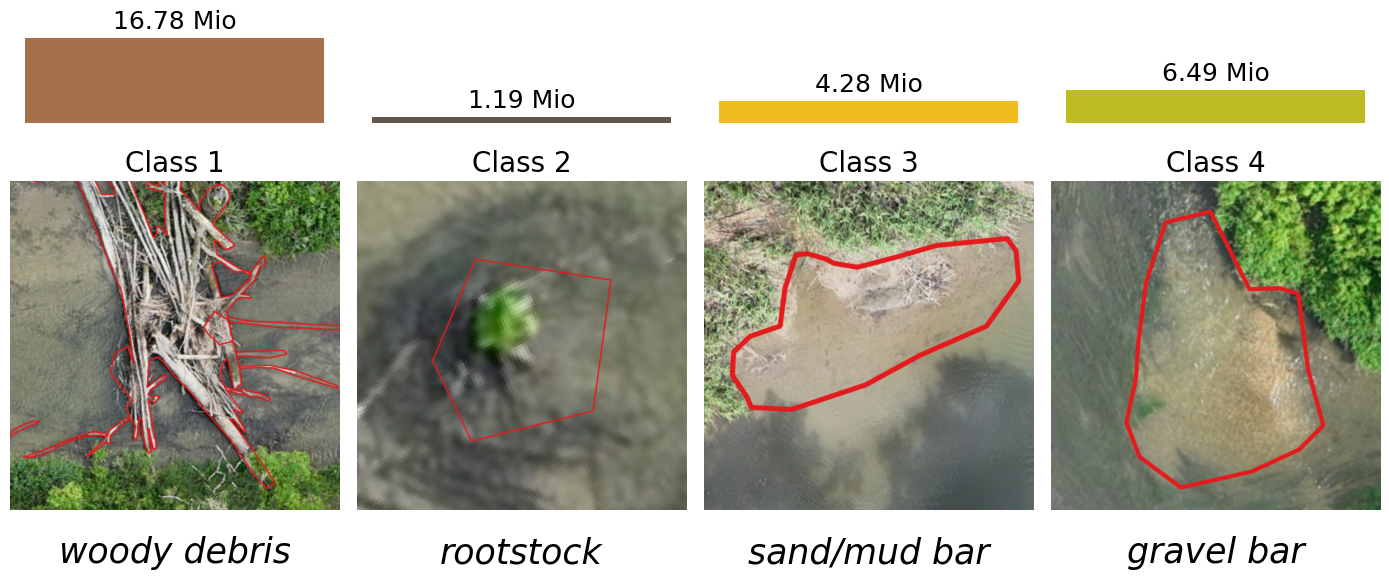

In [15]:
import os
import matplotlib.pyplot as plt
from matplotlib import patches
from PIL import Image

# Inputs
image_names = ["class_1.png", "class_2.png", "class_3.png", "class_4.png"]
class_labels = ["woody debris", "rootstock", "sand/mud bar", "gravel bar"]
pixel_counts = [16775966, 1193945, 4278661, 6488206]  # absolute Pixelzahlen
custom_colors = configs_sc.HYPERPARAMETERS["custom_colors"][-4:]
image_dir = figures_dir

# Balkenhöhen normieren (max = 100)
max_pixels = max(pixel_counts)
relative_heights = [(p / max_pixels) * 100 for p in pixel_counts]

# Plot erstellen
fig, axes = plt.subplots(2, len(image_names), figsize=(14, 6), height_ratios=[2, 10])

for i, (img_name, label, rel_height, abs_pixels) in enumerate(zip(image_names, class_labels, relative_heights, pixel_counts)):
    
    # Bild laden
    img_path = os.path.join(image_dir, img_name)
    img = Image.open(img_path)

    # Balken oben (vertikal)
    ax_bar = axes[0, i]
    bar = ax_bar.bar(0, rel_height, color=custom_colors[i], width=0.5)
    ax_bar.set_ylim(0, 110)  # etwas Luft nach oben
    ax_bar.axis("off")

    # Pixelzahl in Mio über dem Balken
    pixel_mio = abs_pixels / 1e6
    ax_bar.text(0, rel_height + 5, f"{pixel_mio:.2f} Mio", 
                ha="center", va="bottom", fontsize=18, color="black")

    # Screenshot darunter
    ax_img = axes[1, i]
    ax_img.imshow(img)
    ax_img.axis("off")
    
    # Klassennummer oben
    ax_img.set_title(f"Class {i+1}", fontsize=20)

    # Klassenname unten (kursiv)
    ax_img.text(0.5, -0.08, f"{label}", transform=ax_img.transAxes,
                ha="center", va="top", fontsize=25, style="italic")

plt.tight_layout()
plt.show()


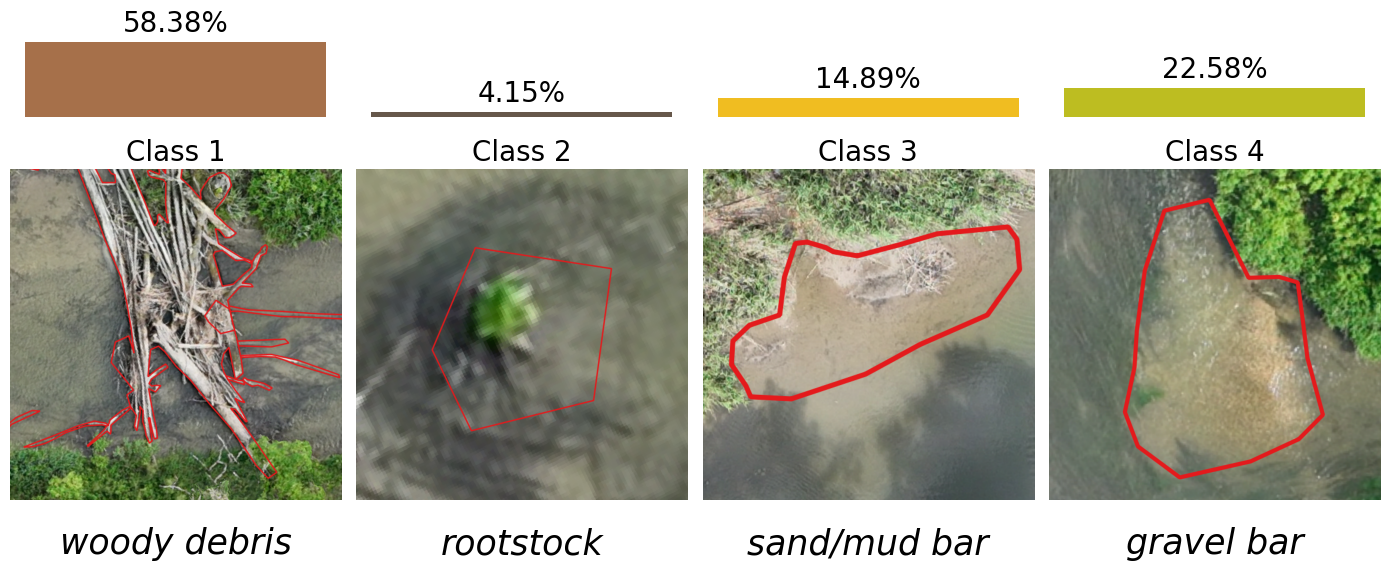

In [12]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Beispielhafte Inputs (anpassen)
image_names = ["class_1.png", "class_2.png", "class_3.png", "class_4.png"]
class_labels = ["woody debris", "rootstock", "sand/mud bar", "gravel bar"]
pixel_counts = [16775966, 1193945, 4278661, 6488206]  # absolute Pixelzahlen für jede Klasse
custom_colors = configs_sc.HYPERPARAMETERS["custom_colors"][-4:]
image_dir = figures_dir

# Gesamtzahl der Pixel (Summe der Pixelanzahlen aller Klassen)
total_pixels = sum(pixel_counts)

# Prozentualer Anteil jeder Klasse an der Gesamtzahl
percentages = [(p / total_pixels) * 100 for p in pixel_counts]

# Plot erstellen
fig, axes = plt.subplots(2, len(image_names), figsize=(14, 6), height_ratios=[2, 10])

for i, (img_name, label, percent, abs_pixels) in enumerate(zip(image_names, class_labels, percentages, pixel_counts)):
    
    # Bild laden
    img_path = os.path.join(image_dir, img_name)
    img = Image.open(img_path)

    # Balken oben (vertikal)
    ax_bar = axes[0, i]
    ax_bar.bar(0, percent, color=custom_colors[i], width=0.5)
    ax_bar.set_ylim(0, max(percentages) * 1.3)  # etwas Luft nach oben
    ax_bar.axis("off")

    # Prozentzahl über dem Balken in Schwarz, zentriert
    ax_bar.text(0, percent + max(percentages) * 0.05, f"{percent:.2f}%", 
                ha="center", va="bottom", fontsize=20, color="black")

    # Screenshot darunter
    ax_img = axes[1, i]
    ax_img.imshow(img)
    ax_img.axis("off")
    
    # Klassennummer oben
    ax_img.set_title(f"Class {i+1}", fontsize=20)

    # Klassenname unten (kursiv)
    ax_img.text(0.5, -0.08, f"{label}", transform=ax_img.transAxes,
                ha="center", va="top", fontsize=25, style="italic")

# Speichern des Plots im figures_dir Ordner
output_path = os.path.join(figures_dir, "fig_classes.png")
plt.tight_layout()
plt.savefig(output_path)

plt.tight_layout()
plt.show()
